# ***Importing Python Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ***Loading Data***

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Classification_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#importing dataset
x = data.iloc[:20000,1:785].values

y = data.iloc[:20000,0].values
y = y.reshape(y.shape[0],1)
x.shape

(20000, 784)

In [ ]:
m, n = x.shape
x.shape,y.shape

((20000, 784), (20000, 1))

In [ ]:
x_norm = x/255
X = x_norm.T
X.shape

(784, 20000)

In [ ]:
""" Y: onehot encoded """
unique_values=(np.unique(y))
Y=np.zeros((m,len(unique_values)))
for i in range(m):
    for j in range(len(unique_values)):
        if y[i][0]==unique_values[j]: Y[i][unique_values[j]]=1

y=Y.T
y.shape

(10, 20000)

# ***Activation Functions ***

In [ ]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
def tanh(x):
    return np.tanh(x)

In [ ]:
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

# ***Initialize Parameters***

In [ ]:
def initialize_parameters(layer_dims):

    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        # parameters['W' + str(l)] = (np.random.randn(layer_dims[l], layer_dims[l-1]))*0.001
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01

        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

# ***Forward Propagation***

In [ ]:
a=[]
print("no. of hidden layers:")
b=int(input())
print("number of neurons in each layer")
for i in range(b):
#     print('number of neurons in layer ' + str{l})
    l=int(input())
    a.append(l)
a

no. of hidden layers:
3
number of neurons in each layer
50
25
15


[50, 25, 15]

In [ ]:
c = X.shape[0]
a.insert(0,c)
# c.append(a)
d = int(y.shape[0])
a.append(d)
a
layer_dims = a
print(layer_dims)
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

[784, 50, 25, 15, 10]
Shape of W1: (50, 784)
Shape of B1: (50, 1) 

Shape of W2: (25, 50)
Shape of B2: (25, 1) 

Shape of W3: (15, 25)
Shape of B3: (15, 1) 

Shape of W4: (10, 15)
Shape of B4: (10, 1) 



In [ ]:
def forward_propagation(X, parameters):

    forward_cache = {}
    L = len(parameters) // 2

    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]


        forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])


    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]



    forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])

    return forward_cache['A' + str(L)], forward_cache

In [ ]:
AL, forw_cache = forward_propagation(X, params)
for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (784, 20000)
Shape of A1 : (50, 20000)
Shape of A2 : (25, 20000)
Shape of A3 : (15, 20000)
Shape of A4 : (10, 20000)


# ***Cost Function***

In [ ]:
def compute_cost(AL, Y):
    cost = -(1./m) * np.sum(y * np.log(AL))
    cost = np.squeeze(cost)
    return cost

# ***Backward Propagation***

In [ ]:
def backward_propagation(AL, y, parameters, forward_cache):

    grads = {}
    L = len(parameters)//2

    grads["dZ" + str(L)] = AL - y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)

    for l in reversed(range(1, L)):


        grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_relu(forward_cache['A' + str(l)])

        grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],forward_cache['A' + str(l-1)].T)
        grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)

    return grads

In [ ]:
grads = backward_propagation(forw_cache["A" + str(b+1)], y, params, forw_cache)

In [ ]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

# ***Gradient Descent***

In [ ]:
def model(X, y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):

    costs = []

    parameters = initialize_parameters(layer_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, y, parameters, forward_cache)

        parameters = update_parameters(parameters, grads, learning_rate)

        costs.append(cost)

        if i % (num_iterations/10) == 0:
            print('iterations = '+ str(i) + ' cost = ' + str(cost))



    return parameters,costs

In [ ]:
lr = 0.009
iters = 2500

parameters,costs = model(X, y, layer_dims, learning_rate = lr, activation = 'relu', num_iterations = iters)

iterations = 0 cost = 2.29866599448333
iterations = 250 cost = 2.013776721324811
iterations = 500 cost = 1.202210250803944
iterations = 750 cost = 0.588034223866607
iterations = 1000 cost = 0.390897083267094
iterations = 1250 cost = 0.3096436528459839
iterations = 1500 cost = 0.2645851983984863
iterations = 1750 cost = 0.23531525197127073
iterations = 2000 cost = 0.21450503971721488
iterations = 2250 cost = 0.19871149559614515


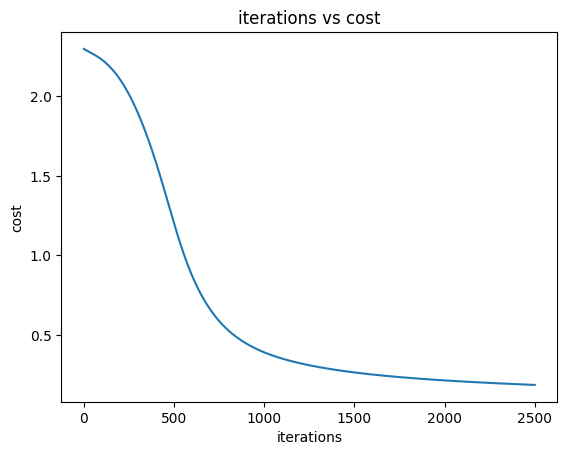

In [ ]:
t = np.arange(0, iters)
plt.plot(t,costs)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

In [ ]:
y_pred,_ = forward_propagation(X, parameters)



y = np.argmax(y, axis =0)

# ***Accuracy On test Data ***

In [ ]:
x_test = data.iloc[20000:,1:785].values
m_test,n_test=x_test.shape
y_test=data.iloc[20000:,0].values
y_test = y_test.reshape(y_test.shape[0],1)
y_test.shape

(10000, 1)

In [ ]:
  x_norm_test = x_test/255
x_test = x_norm_test.T

In [ ]:
y_pred_test,_ = forward_propagation(x_test, parameters)



# y = np.argmax(y, axis =0)
y_pred_test = np.argmax(y_pred_test, axis = 0)

In [ ]:
count=0
for i in range(m_test):

    if y_pred_test[i] ==y_test[i]:
        count+=1
print(count)

9453


In [ ]:
accuracy=(count/m_test)*100
print('Accuracy on test data = '+str(accuracy)+'%')

Accuracy on test data = 94.53%
